In [28]:
import seaborn as sns
import pandas as pd

# Heatmap

Usamos esta gráfica que depende de 2 variables distintas y que permite comparar mediante mapa de calor, la intensidad de como se distribuyen los datos e identificar tendencias o patrones.

Para esto usaremos información de un Dataset.  

Vamos a ver como se distribuye el total de venta entre los dias y por Género.  
Podremos comparar e identificar las ventas que se han realizado entre hombres y mujeres y en que dias se puede ver donde es más alta las ventas y donde es más baja.  

## Pandas
Usaremos pandas para transformar los datos del datset y llegar a la información que necesitamos.  

Crearemos un campo nuevo Dia y usaremos el campo Date para transformar ese campo Fecha y obtener el Dia. 

In [29]:
df_retail = pd.read_csv("data/retail_sales_dataset.csv", parse_dates=["Date"])
df_retail["Dias"] = df_retail["Date"].dt.day_name()
df_retail

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Dias
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Saturday
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Tuesday


 
Luego agruparemos el Campo Dia y Genero y sumaremos el total de venta.  
Aplicamos la funcion unstack(), el cual nos permite manejar una matriz donde tendremos en las columnas los generos y en las filas los dias, con sus respectivos totales.
Al final este calculo lo almacenaremos en nuevo DataFrame.  

In [30]:
df_retail_dia = df_retail.groupby(["Dias", "Gender"])["Total Amount"].sum().unstack()
df_retail_dia


Gender,Female,Male
Dias,,
Friday,31065,35225
Monday,36185,34065
Saturday,40165,38650
Sunday,28970,29630
Thursday,27375,26460
Tuesday,39010,30430
Wednesday,30070,28700


## Usando Seaborn

Seaborn:
1. sns.heatmap() para crear el mapa de calor:  
    1.1. data = asignamos el nuevo dataframe creado.  
    1.2. annot: nos permite mostrar los totales en el mapa de calor.  
    1.3. fmt: nos permite manejar si queremos mostrar decimales o no.   
    1.4. cmap: Permite trabajar con los colores.    
    1.5. cbar_kws: Permite asignar un titulo a la barra.  
    1.6. linewidths: permite dar un espaciado entre la gráfica.  

Matplolib:
1. Complementamos para darle personalidad a la grafica, con respecto a los titulos.

Text(50.72222222222221, 0.5, 'Días')

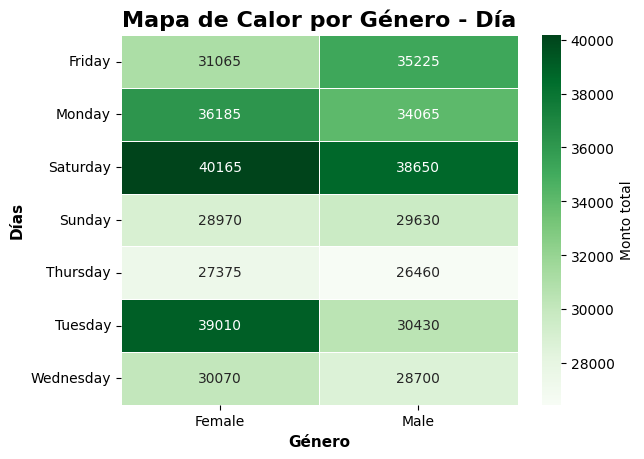

In [45]:
ax = sns.heatmap(data=df_retail_dia, 
                 annot=True, 
                 fmt= ".0f",
                 cmap="Greens", 
                 cbar_kws={"label": "Monto total"}, 
                 linewidths=0.5)

ax.set_title("Mapa de Calor por Género - Día", fontsize=16, fontweight="bold")

ax.set_xlabel("Género", fontsize=11, fontweight="bold")
ax.set_ylabel("Días", fontsize=11, fontweight="bold")
